In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [11]:
import zipfile
from pathlib import Path
import gdown
from ultralytics import YOLO
import yaml
import cv2
from random import sample
import matplotlib.pyplot as plt
import os

In [5]:
google_drive_file_id = '1U4f2a7xyBlXyR3AziL5__D0vn97ifCGC'  # <-- From sharing link in google drive, https://drive.google.com/file/d/1U4f2a7xyBlXyR3AziL5__D0vn97ifCGC/view?usp=drive_link
google_drive_file_name = '20250602z_mju-waste_yolo.zip'
project_root = Path('/content')
dataset_root_name = 'yolo_dataset'
output_path = project_root / google_drive_file_name
extract_dir = project_root / dataset_root_name
dataset_root_path = Path('/content') / dataset_root_name
yaml_path = dataset_root_path / 'data.yaml'


In [9]:
print("working dir is " + str(dataset_root_path))

working dir is /content/yolo_dataset


In [7]:
# download from Google Drive and extract
gdown.download(id=google_drive_file_id, output=str(output_path), quiet=False)
print(f"Dataset downloaded from google drive: {output_path}\n")

print("Extracting...\n")
with zipfile.ZipFile(output_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
print(f"Dataset extracted to: {extract_dir}\n", )

Downloading...
From (original): https://drive.google.com/uc?id=1U4f2a7xyBlXyR3AziL5__D0vn97ifCGC
From (redirected): https://drive.google.com/uc?id=1U4f2a7xyBlXyR3AziL5__D0vn97ifCGC&confirm=t&uuid=46f1cdee-dfd1-49a8-94ec-ed77e553624d
To: /content/20250602z_mju-waste_yolo.zip
100%|██████████| 1.27G/1.27G [00:14<00:00, 84.8MB/s]


Dataset downloaded from google drive: /content/20250602z_mju-waste_yolo.zip

Extracting...

Dataset extracted to: /content/yolo_dataset



In [12]:
  os.remove(dataset_root_path / 'data.yaml')
  print(f"Deleted file: {dataset_root_path / 'data.yaml'}")

Deleted file: /content/yolo_dataset/data.yaml


In [13]:
# create new data.yaml
categories = [{'id': 0, 'name': 'trash'}]  # Replace this with your actual categories

train_path = dataset_root_path / 'images' / 'train'
val_path = dataset_root_path / 'images' / 'val'
test_path = dataset_root_path / 'images' / 'test'
# Build the data dictionary
data = {
    'train': str(train_path),
    'val': str(val_path),
    'test': str(test_path),
    'nc': len(categories),
    'names': [cat['name'] for cat in categories]
}

with open(dataset_root_path / 'data.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("data.yaml created successfully.")


data.yaml created successfully.


In [14]:
# Sanity check that it's possible to train a model with the dataset
dataset_yaml = Path('/content/yolo_dataset/data.yaml')
model = YOLO('yolo11n.pt')
results = model.train(data=str(dataset_yaml), epochs=1, imgsz=640)

print(f"Training complete. Results saved to: {model.trainer.save_dir}")

100%|██████████| 5.35M/5.35M [00:00<00:00, 97.4MB/s]


Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/yolo_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrain

100%|██████████| 755k/755k [00:00<00:00, 20.5MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n summary: 181 layers, 2,590,035 parameters, 2,590,019 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2003.5±1509.7 MB/s, size: 502.1 KB)


train: Scanning /content/yolo_dataset/labels/train... 1477 images, 8 backgrounds, 87 corrupt: 100%|██████████| 1485/1485 [00:02<00:00, 677.29it/s]

train: /content/yolo_dataset/images/train/2019-10-15_18_22_47-54_color.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0365]
train: /content/yolo_dataset/images/train/2019-10-15_18_22_56-42_color.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0385]
train: /content/yolo_dataset/images/train/2019-10-15_18_23_13-27_color.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0417]
train: /content/yolo_dataset/images/train/2019-10-15_18_23_38-91_color.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0542      1.1396]
train: /content/yolo_dataset/images/train/2019-10-15_18_23_57-68_color.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.3052      1.5531]
train: /content/yolo_dataset/images/train/2019-10-15_18_24_11-04_color.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1709.5±1113.7 MB/s, size: 516.2 KB)


val: Scanning /content/yolo_dataset/labels/val... 248 images, 0 backgrounds, 14 corrupt: 100%|██████████| 248/248 [00:00<00:00, 447.22it/s]

val: /content/yolo_dataset/images/val/2019-10-15_18_23_44-06_color.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0242      1.0198      1.0833]
val: /content/yolo_dataset/images/val/2019-10-15_18_24_03-34_color.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0891      1.2979      1.4844]
val: /content/yolo_dataset/images/val/2019-10-15_18_25_00-71_color.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1336]
val: /content/yolo_dataset/images/val/2019-11-12_17_15_09-71_color.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.043]
val: /content/yolo_dataset/images/val/2019-11-12_17_17_35-22_color.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0258      1.0042      1.6771      1.8271]
val: /content/yolo_dataset/images/val/2019-11-12_17_18_07-19_color.png: ignoring corrupt image/label: non-normalized

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1      2.38G      2.931      4.287        2.6         11        640: 100%|██████████| 88/88 [00:35<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.37it/s]


                   all        234        234     0.0728      0.047     0.0279    0.00596

1 epochs completed in 0.013 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


                   all        234        234     0.0677     0.0431     0.0279    0.00596
Speed: 0.4ms preprocess, 3.5ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to runs/detect/train
Training complete. Results saved to: runs/detect/train


In [16]:
# Get the latest results
runs_detect_dir = Path('runs/detect')
train_dirs = [d for d in runs_detect_dir.iterdir() if d.is_dir() and d.name.startswith("train")]
train_dirs.sort(key=lambda d: d.stat().st_mtime, reverse=True)  # sort by modification time
latest_train_dir = train_dirs[0]
print(latest_train_dir)

best_model_path = latest_train_dir / 'weights' / 'best.pt'
print(f"Loading {best_model_path}")


runs/detect/train
Loading runs/detect/train/weights/best.pt



image 1/1 /content/yolo_dataset/images/train/2019-12-10_16_30_32-42_color.png: 480x640 1 trash, 42.8ms
Speed: 1.4ms preprocess, 42.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)


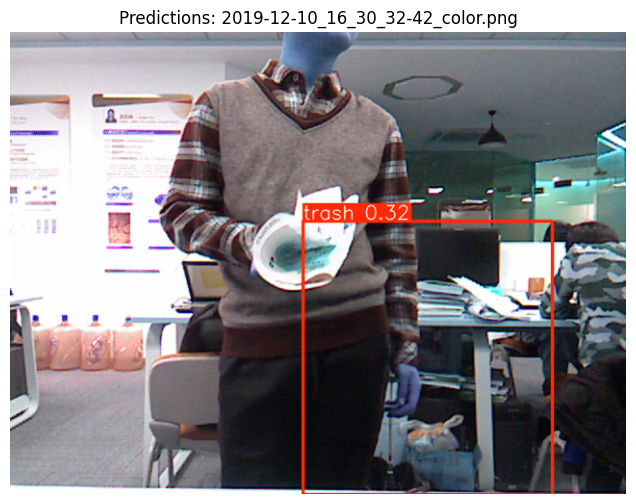


image 1/1 /content/yolo_dataset/images/train/2020-01-07_16_30_32-03_color.png: 480x640 (no detections), 17.6ms
Speed: 2.0ms preprocess, 17.6ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


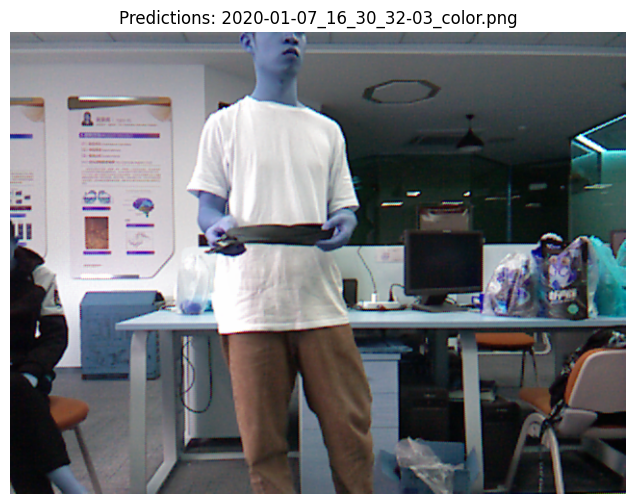


image 1/1 /content/yolo_dataset/images/train/2019-11-12_17_13_59-67_color.png: 480x640 (no detections), 15.4ms
Speed: 3.1ms preprocess, 15.4ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


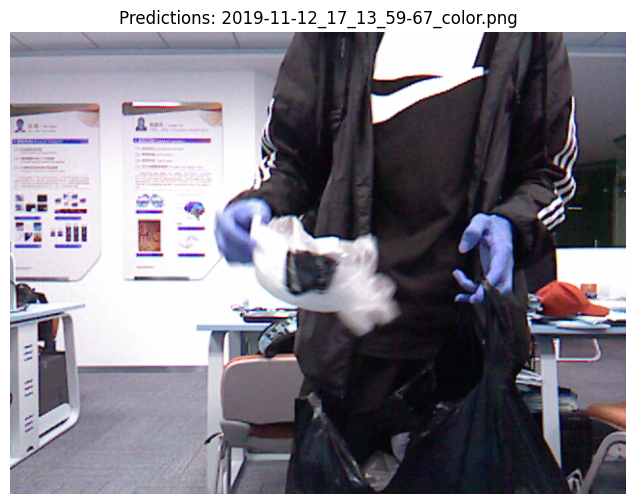


image 1/1 /content/yolo_dataset/images/train/2020-01-07_16_57_43-64_color.png: 480x640 (no detections), 11.9ms
Speed: 6.7ms preprocess, 11.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


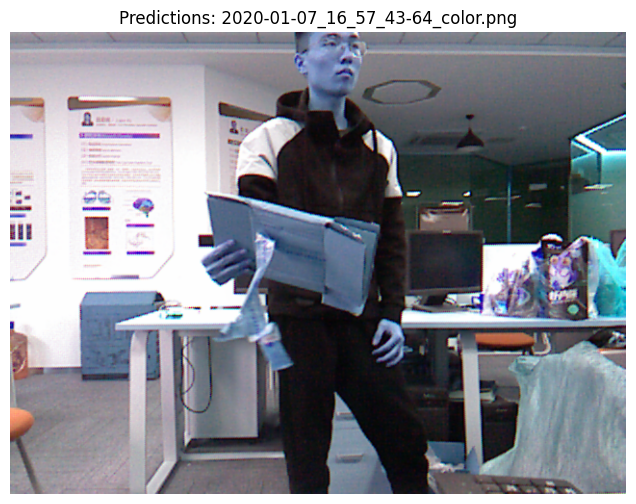


image 1/1 /content/yolo_dataset/images/train/2020-01-07_16_19_46-97_color.png: 480x640 (no detections), 12.4ms
Speed: 2.5ms preprocess, 12.4ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


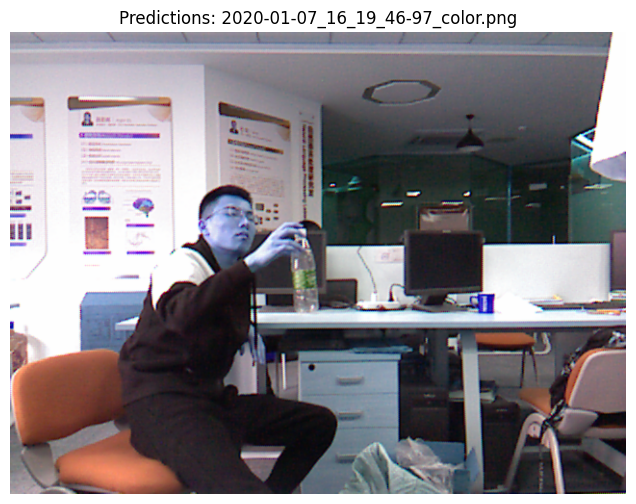


image 1/1 /content/yolo_dataset/images/train/2020-01-07_16_58_26-80_color.png: 480x640 (no detections), 15.5ms
Speed: 2.1ms preprocess, 15.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


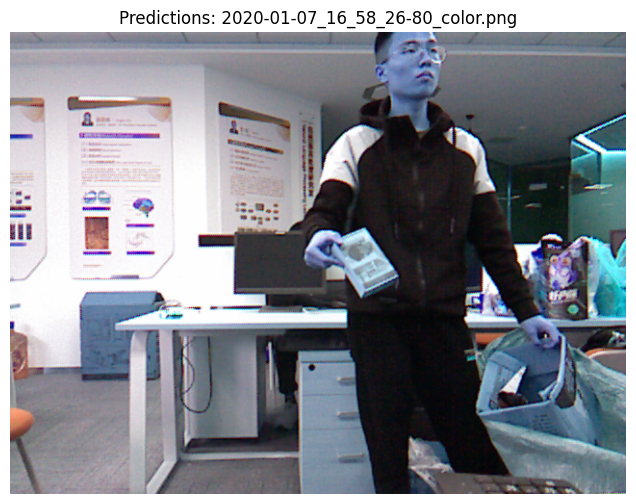


image 1/1 /content/yolo_dataset/images/train/2020-01-07_17_36_00-45_color.png: 480x640 (no detections), 12.4ms
Speed: 2.2ms preprocess, 12.4ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)


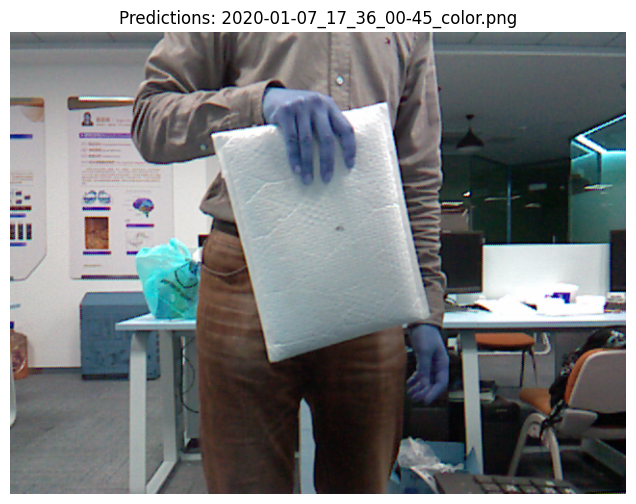


image 1/1 /content/yolo_dataset/images/train/2020-01-07_15_37_25-39_color.png: 480x640 (no detections), 15.6ms
Speed: 2.1ms preprocess, 15.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


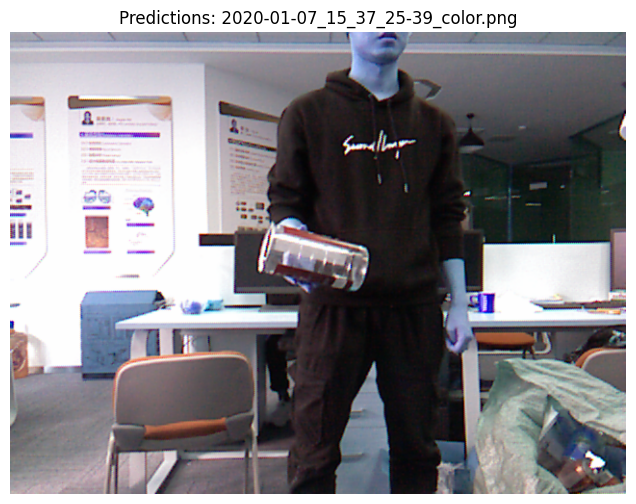


image 1/1 /content/yolo_dataset/images/train/2020-01-07_16_40_49-23_color.png: 480x640 (no detections), 12.8ms
Speed: 2.1ms preprocess, 12.8ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)


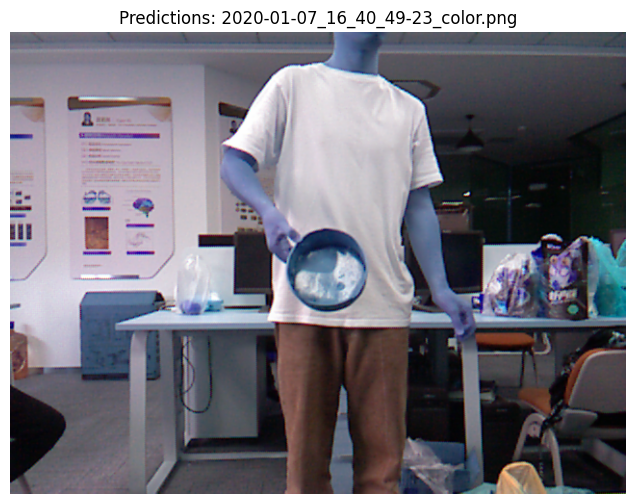


image 1/1 /content/yolo_dataset/images/train/2020-01-07_16_37_46-48_color.png: 480x640 (no detections), 16.0ms
Speed: 4.0ms preprocess, 16.0ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


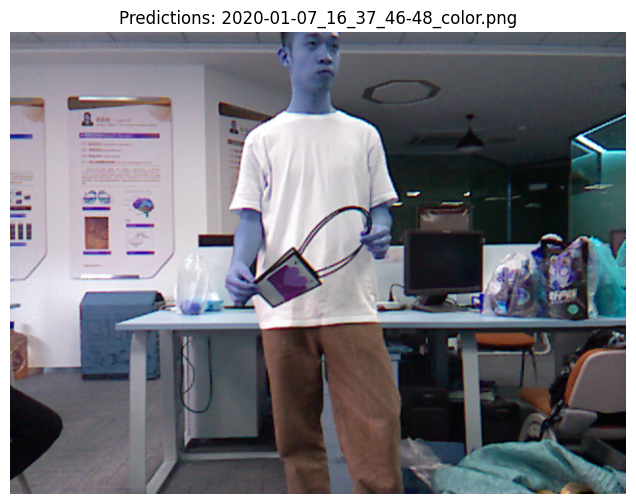

In [17]:
# Load the model and try it out
model = YOLO(best_model_path)
train_images_path = dataset_root_path / "images" / "train"
image_files = list(train_images_path.glob('*.png'))

sample_images = sample(image_files, 10)

for image_path in sample_images:
    result = model(image_path)[0]
    annotated_image = result.plot()

    plt.figure(figsize=(8, 6))
    plt.imshow(annotated_image)
    plt.title(f'Predictions: {image_path.name}')
    plt.axis('off')
    plt.show()